In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

In [ ]:
imput=keras.Input(shape=(784,))

In [ ]:
imput.shape

TensorShape([None, 784])

In [ ]:
imput.dtype

tf.float32

In [ ]:
dense=layers.Dense(64,activation='relu')
x=dense(imput)
x=layers.Dense(64,activation='relu')(x)
outputs=layers.Dense(10)(x)

In [ ]:
model=keras.Model(inputs=imput,outputs=outputs,name='mnist_model')

In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


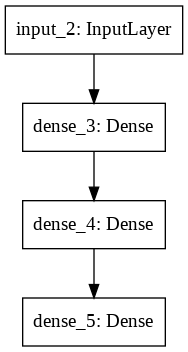

In [ ]:
keras.utils.plot_model(model,"my model.png")

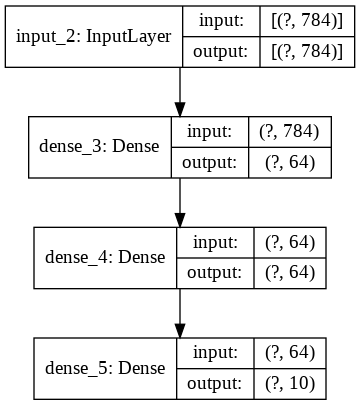

In [ ]:
keras.utils.plot_model(model,"my model.png",show_shapes=True)

Training, evaluation, and inference

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
x_train=x_train.reshape(60000,784).astype("float32")/255
x_test=x_test.reshape(10000,784).astype("float32")/255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

history=model.fit(x_train,y_train,batch_size=64,epochs=2,validation_split=0.2)

test_scores=model.evaluate(x_test,y_test,verbose=2)
print("test loss",test_scores[0])
print("test accuracy",test_scores[1])

Epoch 1/2
750/750 [==============================] - 2s 3ms/step - loss: 0.1175 - accuracy: 0.9646 - val_loss: 0.1244 - val_accuracy: 0.9640
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.0930 - accuracy: 0.9714 - val_loss: 0.1131 - val_accuracy: 0.9693
313/313 - 0s - loss: 0.1041 - accuracy: 0.9681
test loss 0.1041286513209343
test accuracy 0.9681000113487244


In [ ]:
model.save(".")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./assets


In [ ]:
del model
model=keras.models.load_model("/content/saved_model.pb")

OSError: ignored

In [ ]:
encoder_input=keras.Input(shape=(28,28,1),name="img")
x=layers.Conv2D(16,3,activation='relu')(encoder_input)
x=layers.Conv2D(32,3,activation="relu")(x)
x=layers.MaxPooling2D(3)(x)
x=layers.Conv2D(32,3,activation='relu')(x)
x=layers.Conv2D(16,3,activation='relu')(x)
encoder_output=layers.GlobalMaxPooling2D()(x)

encoder=keras.Model(encoder_input,encoder_output,name="encoder")
encoder.summary()

x=layers.Reshape((4,4,1))(encoder_output)
x=layers.Convolution2DTranspose(16,3,activation='relu')(x)
x=layers.Convolution2DTranspose(32,3,activation='relu')(x)
x=layers.UpSampling2D(3)(x)
x=layers.Convolution2DTranspose(16,3,activation='relu')(x)
decoder_output=layers.Convolution2DTranspose(1,3,activation='relu')(x)

autoencoder=keras.Model(encoder_input,decoder_output,name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

In [ ]:
#toy resnet
input=keras.Input(shape=(32,32,3),name="img")
x=layers.Conv2D(32,3,activation='relu')(input)
x=layers.Conv2D(64,3,activation='relu')(x)
block_1_output=layers.MaxPooling2D(3)(x)

x=layers.Conv2D(64,3,activation='relu',padding='same')(block_1_output)
x=layers.Conv2D(64,3,activation='relu',padding='same')(x)
block_2_output=layers.add([x,block_1_output])

x=layers.Conv2D(64,3,activation='relu',padding='same')(block_2_output)
x=layers.Conv2D(64,3,activation='relu',padding='same')(x)
block_3_output=layers.add([x,block_2_output])

x=layers.Conv2D(64,3,activation='relu')(block_3_output)
x=layers.GlobalMaxPooling2D()(x)
x=layers.Dense(256,activation='relu')(x)
x=layers.Dropout(.5)(x)
outputs=layers.Dense(10)(x)

model=keras.Model(input,outputs,name='top_resnet')
model.summary()

Model: "top_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_14[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_15[0][0]                  
_________________________________________________________________________________________

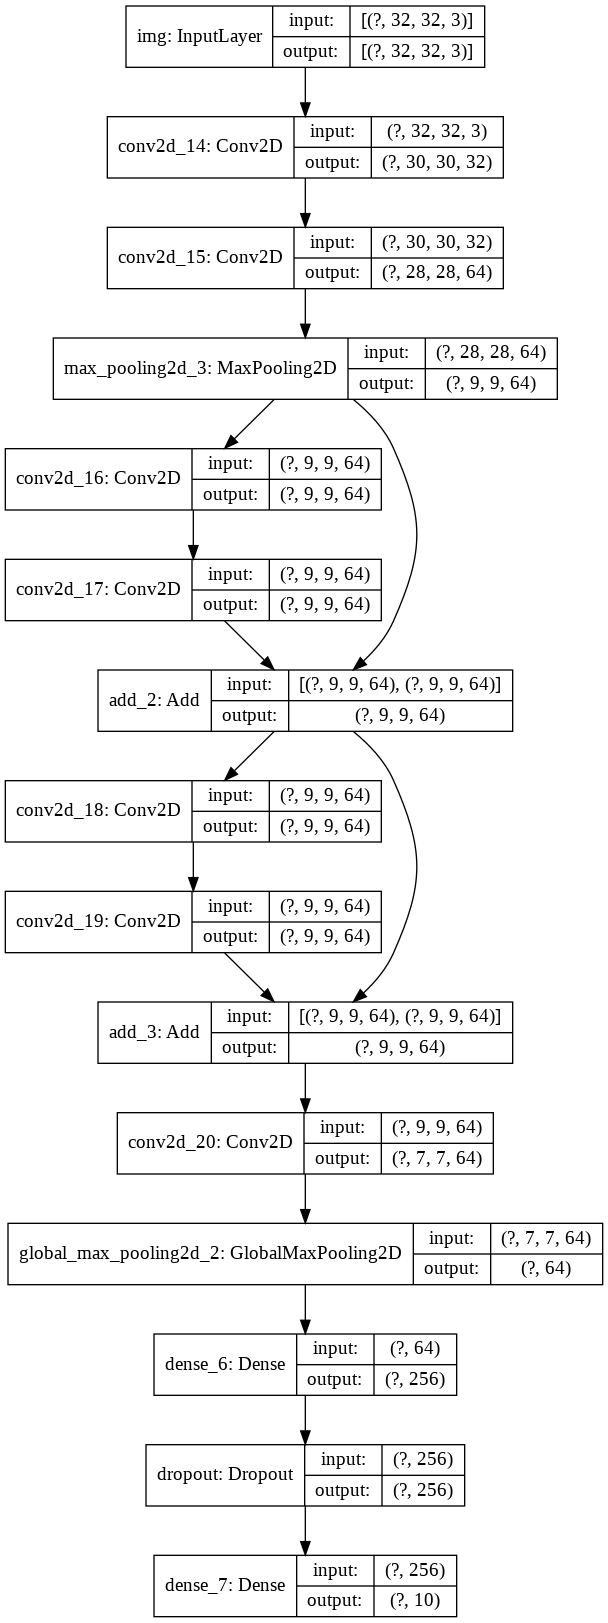

In [ ]:
keras.utils.plot_model(model,"mini_resnet.png",show_shapes=True)

In [ ]:
(x_train,y_train),(x_train,y_test)=keras.datasets.cifar10.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(x_train[:1000],y_train[:1000],batch_size=64,epochs=1,validation_split=.2)

13/13 [==============================] - 4s 328ms/step - loss: 2.3109 - acc: 0.0938 - val_loss: 2.3051 - val_acc: 0.1200
